# Product Recommendation System for an Online Retail Store

## Project carried out by Team Localhost

### Team members:
* Dolapo Adebo (Data Scientist/ML engineer)
* Kenechukwu Ifediorah (Data Engineer/Analyst)
* Chibuoke Juliet (Data Scientist)
* Wofai Alfred Eyong (Data Scientist)
* Eniola Olaleye (ML Engineer)

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [335]:
from sklearn.metrics.pairwise import cosine_similarity
import datetime
import warnings
warnings.filterwarnings("ignore")

In [337]:
# To get the encoding of the file
with open("Global_Superstore2.csv") as f:
    print(f)

<_io.TextIOWrapper name='Global_Superstore2.csv' mode='r' encoding='cp1252'>


In [338]:
data = pd.read_csv("Global_Superstore2.csv", encoding="cp1252")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [340]:
data.shape

(51290, 24)

In [341]:
# Percentage of missing values in each column
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

In [342]:
# Dropping Postal Code Column. This is because it has over 80% null values in its column
data.drop('Postal Code', axis='columns', inplace=True)

In [343]:
data.shape

(51290, 23)

In [344]:
# Change the Order date and ship date to a datetime object
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y')

In [345]:
# Number of days taken for a product to be delivered after an order has been placed
data['Order-Ship Date'] = data['Ship Date'] - data['Order Date']
data['Order-Ship Date'] = data['Order-Ship Date'].astype('str')

In [346]:
data['Order-Ship Date'] = data['Order-Ship Date'].str.split(' ', expand=True)[0] 

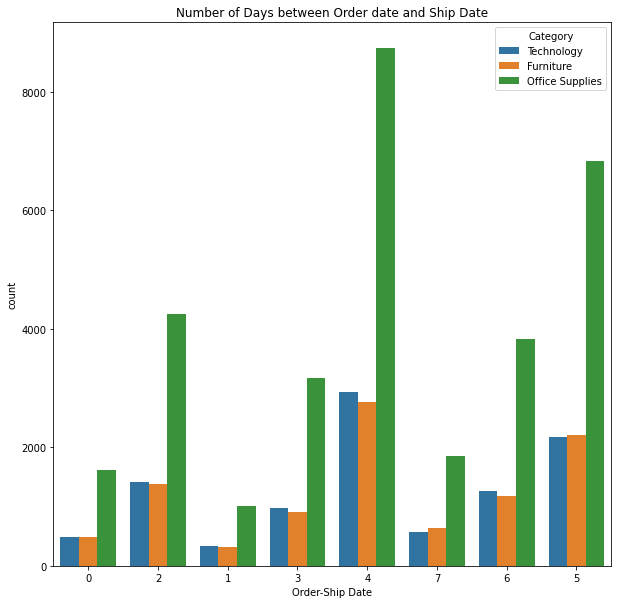

In [347]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Order-Ship Date'], hue=data['Category'])
plt.title('Number of Days between Order date and Ship Date');

In [348]:
# Create a function to check unique values in multiple columns
def unique_(dataframe, cols):
    for i in cols:
        data = dataframe[i].unique()
        print(i,">> Unique Categories:",data,'\n')

In [349]:
cols = ['Ship Mode', 'Segment', 'Market', 'Region','Category', 'Order Priority']
unique_(data, cols)

Ship Mode >> Unique Categories: ['Same Day' 'Second Class' 'First Class' 'Standard Class'] 

Segment >> Unique Categories: ['Consumer' 'Corporate' 'Home Office'] 

Market >> Unique Categories: ['US' 'APAC' 'EU' 'Africa' 'EMEA' 'LATAM' 'Canada'] 

Region >> Unique Categories: ['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada'] 

Category >> Unique Categories: ['Technology' 'Furniture' 'Office Supplies'] 

Order Priority >> Unique Categories: ['Critical' 'Medium' 'High' 'Low'] 



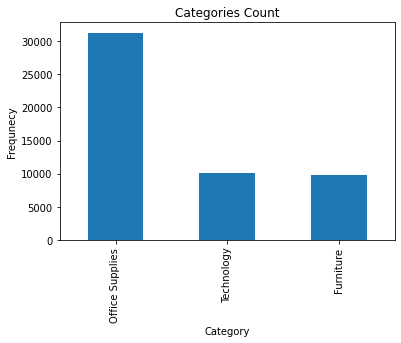

In [350]:
data['Category'].value_counts().plot(kind='bar',
                                     title='Categories Count',
                                     xlabel='Category',
                                     ylabel='Frequnecy');

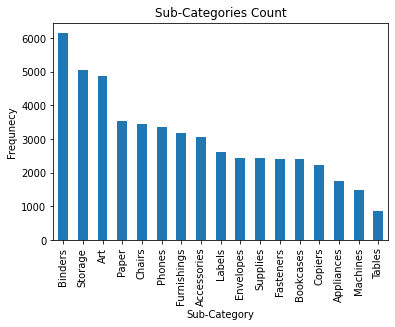

In [351]:
data['Sub-Category'].value_counts().plot(kind='bar',
                                     title='Sub-Categories Count',
                                     xlabel='Sub-Category',
                                     ylabel='Frequnecy');

In [352]:
data.groupby('Category')['Sub-Category'].value_counts().to_frame()

Sub-Category
Category        Sub-Category              
Furniture       Chairs                3434
                Furnishings           3170
                Bookcases             2411
                Tables                 861
Office Supplies Binders               6152
                Storage               5059
                Art                   4883
                Paper                 3538
                Labels                2606
                Envelopes             2435
                Supplies              2425
                Fasteners             2420
                Appliances            1755
Technology      Phones                3357
                Accessories           3075
                Copiers               2223
                Machines              1486

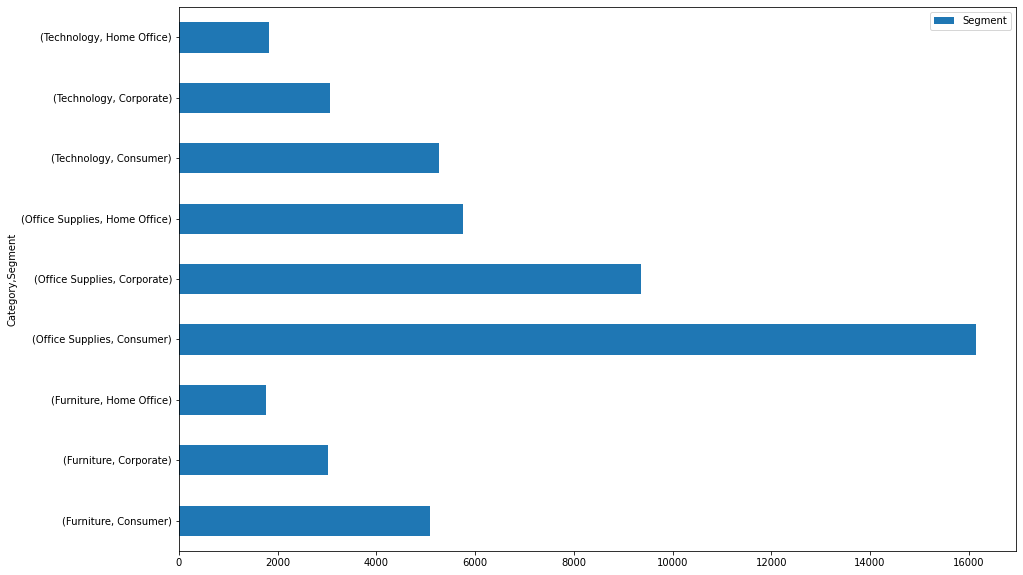

In [353]:
data.groupby('Category')['Segment'].value_counts().to_frame().plot(kind='barh', figsize=(15,10));

In [354]:
data.groupby('Region')['Segment'].value_counts().to_frame()

Segment
Region         Segment             
Africa         Consumer        2381
               Corporate       1312
               Home Office      894
Canada         Consumer         202
               Corporate        110
               Home Office       72
Caribbean      Consumer         828
               Corporate        507
               Home Office      355
Central        Consumer        5782
               Corporate       3321
               Home Office     2014
Central Asia   Consumer        1042
               Corporate        613
               Home Office      393
EMEA           Consumer        2538
               Corporate       1574
               Home Office      917
East           Consumer        1469
               Corporate        877
               Home Office      502
North          Consumer        2468
               Corporate       1487
               Home Office      830
North Asia     Consumer        1170
               Corporate        708
               Home Office      460
Oceania        Consumer        1837
               Corporate       1053
               Home Office      597
South          Consumer        3479
               Corporate       1998
               Home Office     1168
Southeast Asia Consumer        1650
               Corporate        909
               Home Office      570
West           Consumer        1672
               Corporate        960
               Home Office      571

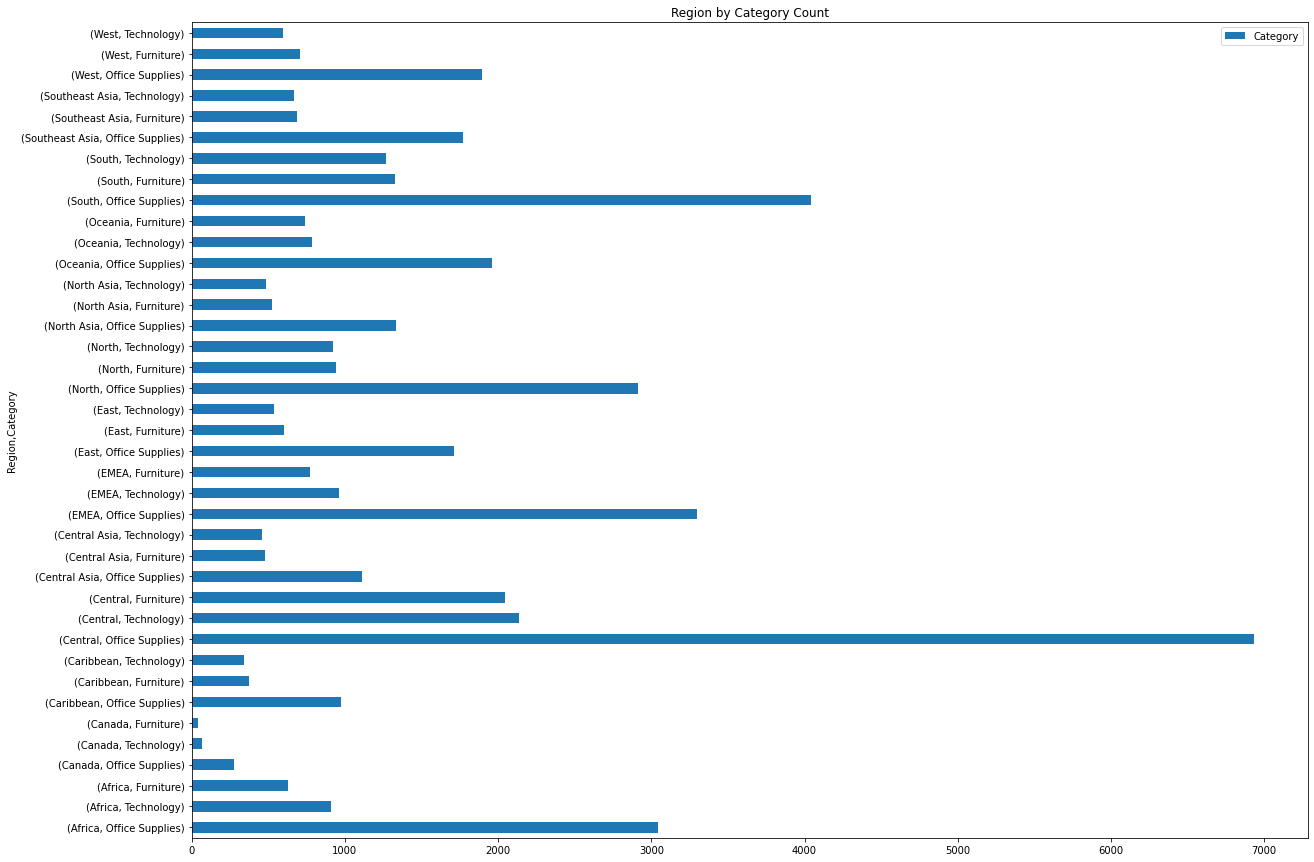

In [355]:
data.groupby('Region')['Category'].value_counts().to_frame().plot(kind='barh',figsize=(20,15), title='Region by Category Count');

In [356]:
# minimal test
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order-Ship Date
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,0


In [357]:
pivot_df = pd.pivot_table(data,index = 'Order ID',columns = 'Product Name',values = 'Order Priority',aggfunc = 'count')
pivot_df.reset_index(inplace=True)
pivot_df = pivot_df.fillna(0)
pivot_df = pivot_df.drop('Order ID', axis=1)

In [358]:
pivot_df.head(2)

Product Name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
co_matrix = pivot_df.T.dot(pivot_df)
np.fill_diagonal(co_matrix.values, 0)

cos_score_df = pd.DataFrame(cosine_similarity(co_matrix))
cos_score_df.index = co_matrix.index
cos_score_df.columns = np.array(co_matrix.index)

In [360]:
#Take top five scoring recs that aren't the original product
product_recs = []
for i in cos_score_df.index:
    product_recs.append(cos_score_df[cos_score_df.index!=i][i].sort_values(ascending = False)[0:5].index)
    
product_recs_df = pd.DataFrame(product_recs)
product_recs_df.index = cos_score_df.index

In [361]:
product_recs_df

,0,1,2,3,4
Product Name,,,,,
"""While you Were Out"" Message Book, One Form per Page",Avery 500,4009 Highlighters by Sanford,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",Geemarc AmpliPOWER60,"Global Leather Task Chair, Black"
"#10 Gummed Flap White Envelopes, 100/Box","Dixon Prang Watercolor Pencils, 10-Color Set w...",Sauder Barrister Bookcases,Newell 331,Southworth Structures Collection,"Iceberg Nesting Folding Chair, 19w x 6d x 43h"
#10 Self-Seal White Envelopes,"Verbatim Slim CD and DVD Storage Cases, 50/Pack",Acme Design Stainless Steel Bent Scissors,Avery 491,Acme Kleencut Forged Steel Scissors,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi..."
"#10 White Business Envelopes,4 1/8 x 9 1/2",AT&T 1080 Phone,Newell 34,"Bush Cubix Collection Bookcases, Fully Assembled",Anker 36W 4-Port USB Wall Charger Travel Power...,Xerox 1971
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",Xiaomi Mi3,Binder Posts,Wasp CCD Handheld Bar Code Reader,"GE 4 Foot Flourescent Tube, 40 Watt",Bevis Round Conference Table Top & Single Colu...
...,...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4","Eldon Imàge Series Desk Accessories, Clear",Avery 491,Design Ebony Sketching Pencil,"Eldon 200 Class Desk Accessories, Burgundy",Weyerhaeuser First Choice Laser/Copy Paper (20...
iOttie HLCRIO102 Car Mount,Griffin GC36547 PowerJolt SE Lightning Charger,Faber Castell Col-Erase Pencils,"Bush Westfield Collection Bookcases, Dark Cher...","BOSTON Ranger #55 Pencil Sharpener, Black",Tensor Track Tree Floor Lamp
iOttie XL Car Mount,Xerox 1894,Ibico Ibimaster 300 Manual Binding System,Xerox 225,Office Star - Contemporary Task Swivel Chair,Logitech M510 Wireless Mouse


In [362]:
product_recs_df.loc['Nokia Smart Phone, with Caller ID']

0                    BIC Canvas, Easy-Erase
1                   Breville Blender, Black
2             Nokia Headset, with Caller ID
3    Samsung Signal Booster, with Caller ID
4     Dania Floating Shelf Set, Traditional
Name: Nokia Smart Phone, with Caller ID, dtype: object

In [363]:
def recommend(df,item):
    recs_products = list(df.loc[item])
    
    url = ['https://'+each +'.com' for each in df.loc[item].str.replace(' ','')]
    price = [randint(100,1000) for i in range(len(df.loc[item]))]
    
    result = pd.DataFrame(url,recs_products, columns=['Url']).reset_index().rename(columns={'index':'Recommended Products'})
    result['Price'] =price

    return result

In [364]:
result = recommend(product_recs_df,'Nokia Smart Phone, with Caller ID')
result

,Recommended Products,Url,Price
0,"BIC Canvas, Easy-Erase","https://BICCanvas,Easy-Erase.com",921
1,"Breville Blender, Black","https://BrevilleBlender,Black.com",334
2,"Nokia Headset, with Caller ID","https://NokiaHeadset,withCallerID.com",705
3,"Samsung Signal Booster, with Caller ID","https://SamsungSignalBooster,withCallerID.com",204
4,"Dania Floating Shelf Set, Traditional","https://DaniaFloatingShelfSet,Traditional.com",425


In [365]:
for row in result.iterrows():
    rec_product = row[1][0]
    rec_url = row[1][1]
    rec_price = row[1][2]
    print(rec_product, '\n', rec_url, '\n', rec_price)

BIC Canvas, Easy-Erase 
 https://BICCanvas,Easy-Erase.com 
 921
Breville Blender, Black 
 https://BrevilleBlender,Black.com 
 334
Nokia Headset, with Caller ID 
 https://NokiaHeadset,withCallerID.com 
 705
Samsung Signal Booster, with Caller ID 
 https://SamsungSignalBooster,withCallerID.com 
 204
Dania Floating Shelf Set, Traditional 
 https://DaniaFloatingShelfSet,Traditional.com 
 425
